In [1]:
Декомпозиция домашнего задания:

1)загрузить файл HR.csv в pandas dataframe
2)рассчитать основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение)
3)рассчитать и визуализировать корреляционную матрицу для количественных переменных
3.1)определить две самые скоррелированные и две наименее скоррелированные переменные
4)рассчитать сколько сотрудников работает в каждом департаменте
5)показать распределение сотрудников по зарплатам
6)показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
7)проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким
окладом
8)рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
Доля сотрудников с повышением за последние 5 лет
Средняя степень удовлетворенности
Среднее количество проектов
9)разделить данные на тестовую и обучающую выборки
9.1)построить модель LDA предсказывающую уволится ли сотрудник на основе имеющихся факторов (кроме department и salary)
9.2)оценить качество модели на тестовой выборки
10)загрузить jupyter notebook с решение на github и прислать ссылку

Определение к каким типам относятся шаги реализации задания используя модель Киневин:
1 - простая(вызвать нужный метод) - 5
2 - сложная(определить количественные переменные и написать метод или класс) - 10
3 - простая(вызвать нужный метод)
3.1 - простая(вызвать нужный метод и написать вывод) - 10
4 - простая(сделать группировку и вызвать метод) - 5
5 - простая(вызвать нужный метод) - 5
6 - простая(сделать группировку и вызвать метод) - 5
7 - сложная(написать один или несколько методов или классов) - 10
8 - простая(посчитать) - 10
9 - простая(вызвать нужный метод и написать выводы) - 20
10 - простая(вызвать нужный метод) - 5

SyntaxError: invalid syntax (<ipython-input-1-8846f8a6420e>, line 1)

In [2]:
# задание 1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('HR.csv', na_values = ['\n'])
df.info() # проверка данных
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# задание 2
statistics = ['satisfaction_level',
              'last_evaluation',
              'number_project',
              'average_montly_hours',
              'time_spend_company']               # определение количественных переменных

def get_statistics(column_name):
    """
    метод возвращающий основные статистики
    входные данные - список с количественными значениями
    выходные данные - среднее значение, медиана, минимум, максимум, среднеквадратичное отклонение, мода
    """
    s = df[column_name].describe()                # получение основных статистик
    mean_ = s[1]                                  # среднее значение
    median_ = s[4]                                # медиана
    min_ = s[3]                                   # минимум
    max_ = s[7]                                   # максимум
    std_ = s[2]                                   # среднеквадратичное отклонение
    mode_ = df[column_name].mode()[0]             # мода
    return mean_, median_, min_, max_, std_, mode_

for s in statistics:
    print(s, get_statistics(s))
help(get_statistics)

satisfaction_level (0.6128335222348166, 0.44, 0.09, 1.0, 0.2486306510611418, 0.1)
last_evaluation (0.7161017401159978, 0.56, 0.36, 1.0, 0.17116911062327592, 0.55)
number_project (3.80305353690246, 3.0, 2.0, 7.0, 1.2325923553183857, 4)
average_montly_hours (201.0503366891126, 156.0, 96.0, 310.0, 49.943099371284305, 135)
time_spend_company (3.498233215547703, 3.0, 2.0, 10.0, 1.4601362305354546, 3)
Help on function get_statistics in module __main__:

get_statistics(column_name)
    метод возвращающий основные статистики
    входные данные - список с количественными значениями
    выходные данные - среднее значение, медиана, минимум, максимум, среднеквадратичное отклонение, мода



2 наиболее скоррелированные переменные - number_project и average_montly_hours - 0.42
2 наиболее обратно скоррелированные переменные - number_project и satisfaction_level - -0.14
2 наименее скоррелированные переменные - satisfaction_level и average_montly_hours -0.02
гипотезы:
1)чем больше проектов тем больше кол-во часов на работе в месяц
2)чем меньше уровень удовлетворённости работой тем меньше кол-во проектов
3)уровень удовлетворённости работой не влияет на среднее кол-во часов которое сотрудник проводит на работе в месяц4)корреляция 0.35 между last_evaluation(последняя оценка в годах) и number_project(кол-вом проектов) чаще last_evaluation больше кол-во проектов
5)корреляция 0.34 между last_evaluation(последняя оценка в годах) и average_montly_hours(среднее количество часов на рабочем месте в месяц) чаще last_evaluation больше среднее количество часов на рабочем месте в месяц


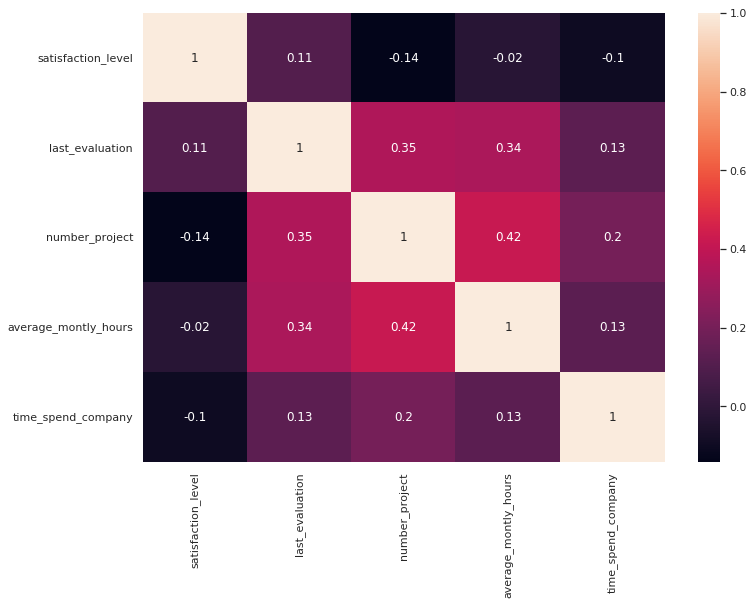

In [4]:
# задание 3
corr_matrix = df[statistics]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr_matrix.corr(), annot=True)
print('2 наиболее скоррелированные переменные - number_project и average_montly_hours - 0.42')
print('2 наиболее обратно скоррелированные переменные - number_project и satisfaction_level - -0.14')
print('2 наименее скоррелированные переменные - satisfaction_level и average_montly_hours -0.02')
del(corr_matrix)                                 # можно удалить временный объект
print('гипотезы:\n1)чем больше проектов тем больше кол-во часов на работе в месяц\n'\
      '2)чем меньше уровень удовлетворённости работой тем меньше кол-во проектов\n'\
      '3)уровень удовлетворённости работой не влияет на среднее кол-во часов которое сотрудник проводит на работе в месяц'\
      '4)корреляция 0.35 между last_evaluation(последняя оценка в годах) и number_project(кол-вом проектов) чаще last_evaluation больше кол-во проектов\n'\
      '5)корреляция 0.34 между last_evaluation(последняя оценка в годах) и average_montly_hours(среднее количество часов на рабочем месте в месяц) чаще last_evaluation больше среднее количество часов на рабочем месте в месяц')

In [5]:
# задание 4
def get_number_of_employees():
    """метод возвращает словарь с названием департамента и кол-вом сотрудников в нём"""
    all_departments = list(set(df['department'].values))         # список всех департаментов
    number_of_employees = {}                                     # словарь с названием департаментов и кол-вом сотрудников в нём
    for i in all_departments:
        number_of_employees.update({i: len(df[df.department == i])})
    return number_of_employees
print(get_number_of_employees())
help(get_number_of_employees)

{'sales': 4140, 'marketing': 858, 'hr': 739, 'product_mng': 902, 'RandD': 787, 'IT': 1227, 'support': 2229, 'accounting': 767, 'technical': 2720, 'management': 630}
Help on function get_number_of_employees in module __main__:

get_number_of_employees()
    метод возвращает словарь с названием департамента и кол-вом сотрудников в нём



low       7316
medium    6446
high      1237
Name: salary, dtype: int64


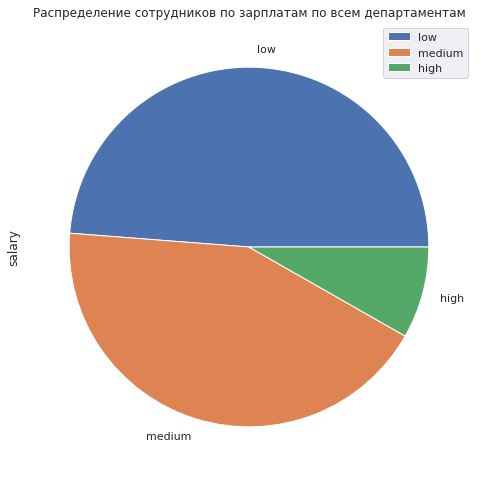

In [6]:
# задание 5
def show_distribution(show_df, title_):
    print(show_df['salary'].value_counts())
    show_df['salary'].value_counts().plot(kind='pie',
                                          title=title_)
    plt.legend()
show_distribution(df, 'Распределение сотрудников по зарплатам по всем департаментам')

low       2099
medium    1772
high       269
Name: salary, dtype: int64


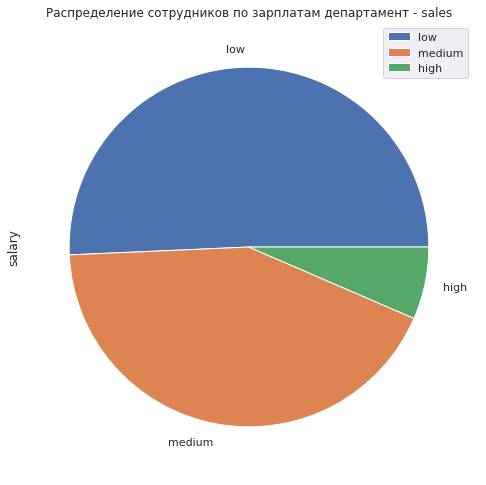

low       402
medium    376
high       80
Name: salary, dtype: int64


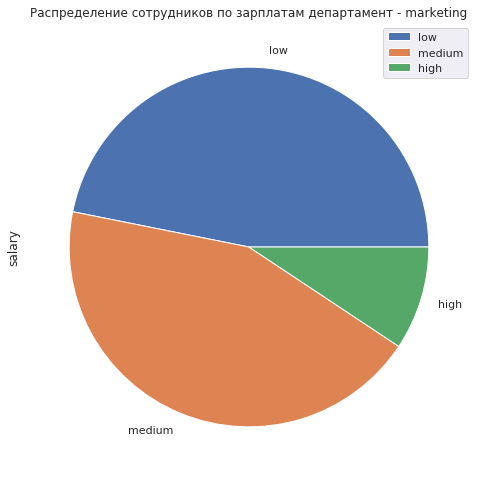

medium    359
low       335
high       45
Name: salary, dtype: int64


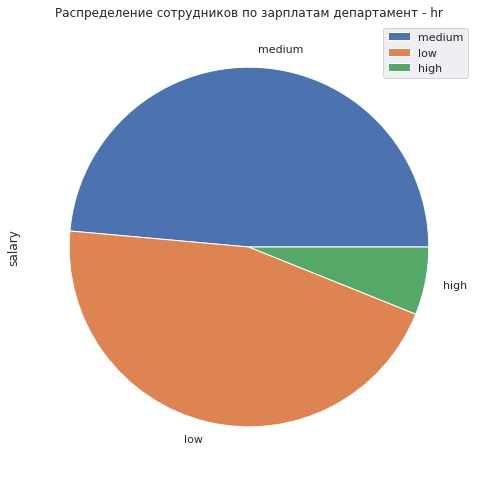

low       451
medium    383
high       68
Name: salary, dtype: int64


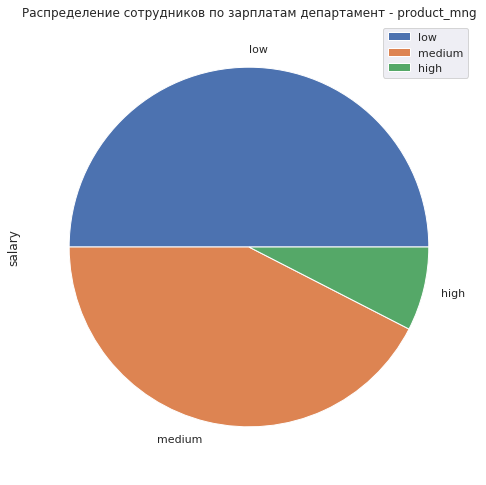

medium    372
low       364
high       51
Name: salary, dtype: int64


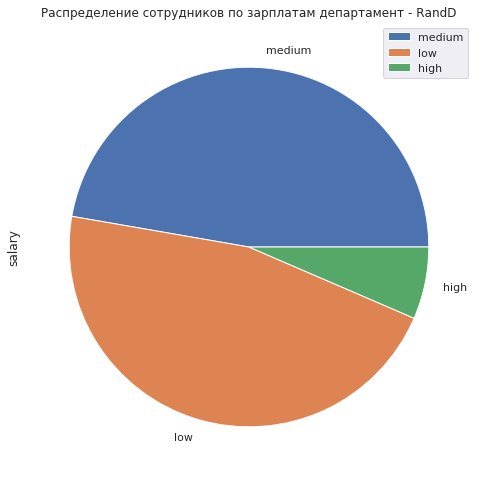

low       609
medium    535
high       83
Name: salary, dtype: int64


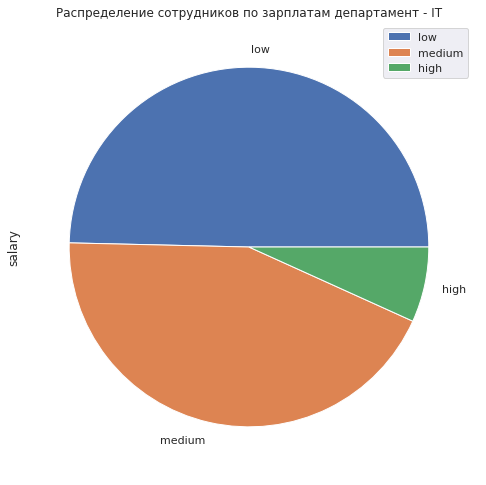

low       1146
medium     942
high       141
Name: salary, dtype: int64


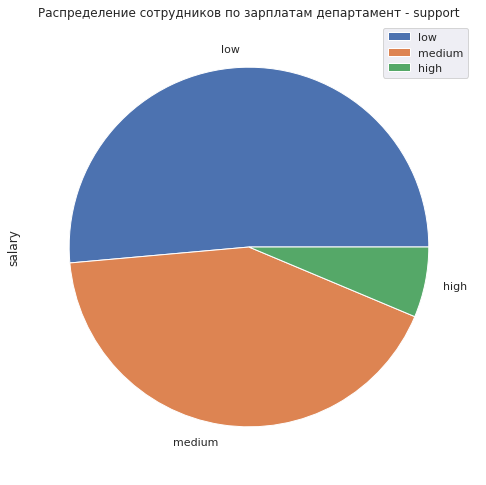

low       358
medium    335
high       74
Name: salary, dtype: int64


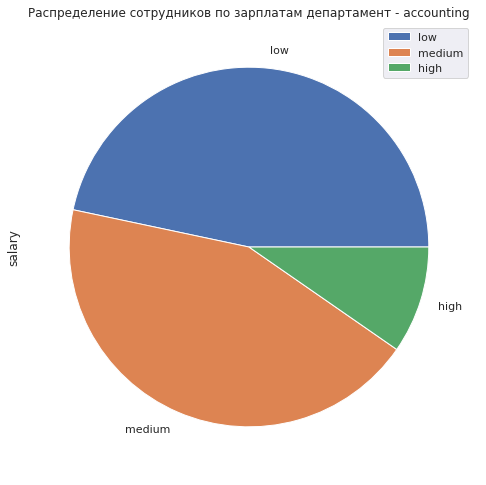

low       1372
medium    1147
high       201
Name: salary, dtype: int64


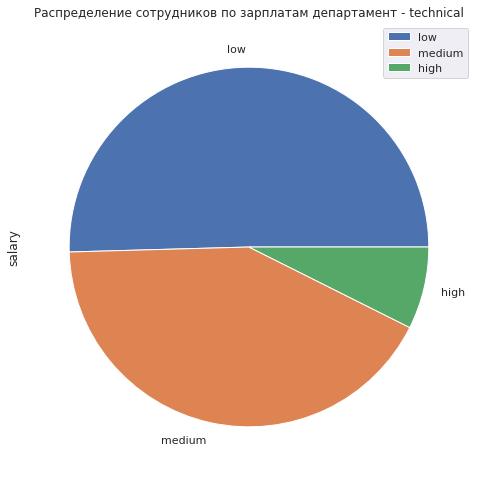

high      225
medium    225
low       180
Name: salary, dtype: int64


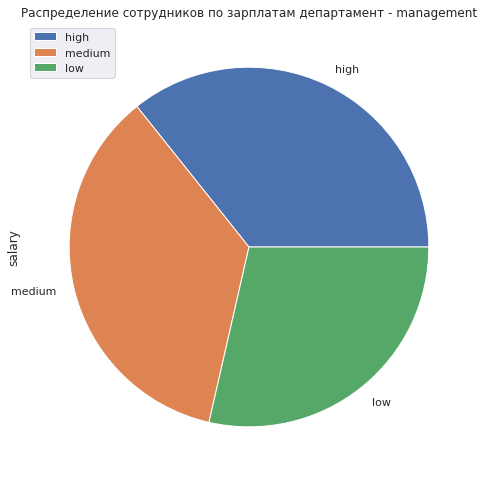

In [7]:
# задание 6
all_departments = list(set(df['department'].values))         # список всех департаментов

for i in all_departments:
    show_distribution(df[df.department == i], 'Распределение сотрудников по зарплатам департамент - ' + i)
    plt.show()

Statistics=0.971, p-value=0.000
данные не имеют нормального распределения
сотрудники с высоким окладом проводят на работе не больше времени чем сотрудники с низким окладом
MannwhitneyuResult(statistic=4507096.5, pvalue=0.4120665360429347)


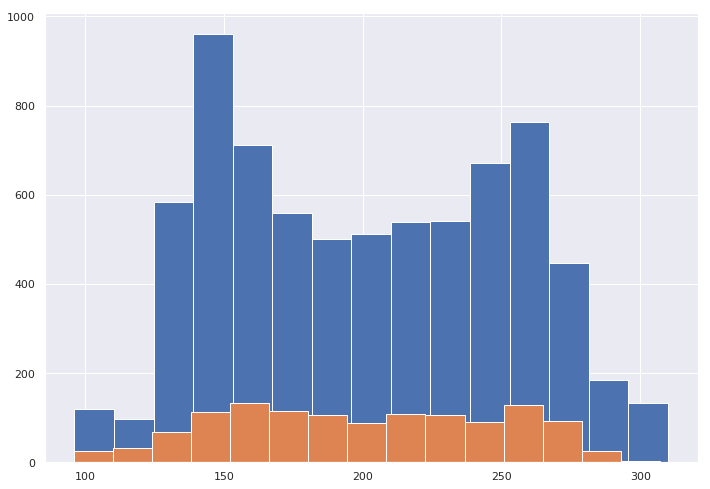

In [8]:
# задание 7
from scipy import stats
from scipy.stats import mannwhitneyu
import math

def hypothesis_testing(PVALUE, ALPHA, H0, H1):
    if PVALUE > ALPHA:
        print(H0)
    else:
        print(H1)

low_salary = df[df['salary'] == 'low']
high_salary = df[df['salary'] == 'high']
ALPHA = 0.05

H0 = 'данные имеют нормальное распределение'
H1 = 'данные не имеют нормального распределения'
stat, PVALUE = stats.shapiro(high_salary['average_montly_hours']) # тест Шапиро-Уилк
print('Statistics=%.3f, p-value=%.3f' % (stat, PVALUE))
hypothesis_testing(PVALUE, ALPHA, H0, H1)

H0 = 'сотрудники с высоким окладом проводят на работе не больше времени чем сотрудники с низким окладом'
H1 = 'сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом'
PVALUE = mannwhitneyu(low_salary['average_montly_hours'].values, high_salary['average_montly_hours'].values)[1]
hypothesis_testing(PVALUE, ALPHA, H0, H1)
print(mannwhitneyu(low_salary['average_montly_hours'].values, high_salary['average_montly_hours'].values))

plt.hist(low_salary['average_montly_hours'], bins=15);
plt.hist(high_salary['average_montly_hours'], bins=15);

In [9]:
# задание 8
employees_who_quit = df[df.left == 1]
employees_who_did_not_quit = df[df.left == 0]
lp5y = employees_who_quit[employees_who_quit.promotion_last_5years == 1]
lpnp5y = employees_who_quit[employees_who_quit.promotion_last_5years == 0]

nlp5y = employees_who_did_not_quit[employees_who_did_not_quit.promotion_last_5years == 1]
nlpnp5y = employees_who_did_not_quit[employees_who_did_not_quit.promotion_last_5years == 0]
print('Доля сотрудников с повышением за последние 5 лет:')
print('среди тех кто уволился', 100 / ((len(lp5y) + len(lpnp5y)) / len(lp5y)), '%')
print('среди тех кто остался работать', 100 / ((len(nlp) + len(nlnp)) / len(nlp)), '%')
print('\nСредняя степень удовлетворённости:')
print('среди тех кто уволился', employees_who_quit['satisfaction_level'].mean())
print('среди тех кто остался работать', employees_who_did_not_quit['satisfaction_level'].mean())
print('\nСреднее кол-во проектов за время работы:')
print('среди тех кто уволился', employees_who_quit['number_project'].mean())
print('среди тех кто остался работать', employees_who_did_not_quit['number_project'].mean())

Доля сотрудников с повышением за последние 5 лет:
среди тех кто уволился 0.5320638476617194 %


NameError: name 'nlp' is not defined

In [10]:
# задание 9
# входные данные
train = df[['satisfaction_level', 'number_project', 'average_montly_hours']]
# выходные данные
target = df['left']
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.25)

# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# делаем прогноз на тестовой выборке
lda.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
6134,0.0,NaN
11513,0.0,NaN
3507,0.0,1.0
4592,0.0,NaN
5236,0.0,NaN
14272,1.0,NaN
14649,1.0,NaN
149,1.0,0.0
10311,0.0,NaN
4665,0.0,NaN


In [11]:
# оцениваем качество модели на тестовой выборке
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7802666666666667

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

classifier = RandomForestClassifier(max_depth=4, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy ' + str(accuracy_score(y_test, y_pred)))

[[2856   15]
 [ 243  636]]
Accuracy 0.9312


/home/jgjytrwetgdgn/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
# использование модели
pred = {'satisfaction_level'  : 0.38,
        'number_project'      : 2,
        'average_montly_hours': 137}
t = pd.DataFrame([pred['satisfaction_level'],
                  pred['number_project'],
                  pred['average_montly_hours']]).T
y_pred = classifier.predict(t)
y_pred

array([1])